# How do people feel when tweeting #METOO, #BLM, and #MAGA?

# Accessing tweets

In [1]:
import os
import tweepy as tw
import pandas as pd

#access_token = ''
#access_secret = ''
#consumer_key = ''
#consumer_secret = ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [13]:
new_search = "#metoo -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(100)

metoo_tweets = [tweet.text for tweet in tweets]
metoo_tweets[:5]

['@Alyssa_Milano @JoeBiden @KamalaHarris You realize you killed the #MeToo movement',
 '@Law360, spoofing is the selling of the same bar of #Gold  multiple times. #MeToo #Veterans, if you own paper gold,… https://t.co/k7MCi3SDp3',
 '@Alyssa_Milano @TIMESUPNOW Did she support sexual predators like @JoeBiden like you do?  #MeToo #TaraReade',
 '@MotherJones Cue the #MeToo frauds. Watch how democrats AND media attack a woman due to her religious beliefs. Woul… https://t.co/VY0CKOVZ5t',
 '@briantylercohen It’s the voters paying them to get you out.  You look like you’re about to burst into tears.  #metoo. 🤣']

In [14]:
new_search = "#blm -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(100)

blm_tweets = [tweet.text for tweet in tweets]
blm_tweets[:5]

['Inside the Breonna Taylor Drug Cartel. Part 2 https://t.co/NXMEj3zpfM via @YouTube Forget the KKK and Antifa. Charl… https://t.co/Wu2MFSvvBO',
 'Are you #Mad? Upset? Confused? Don’t be The #Israelites have the solution to the problem! It’s not #voting,… https://t.co/8Ksv67NGNZ',
 'Tonight. Englewood, NJ. #JusticeForBreonnaTaylor #BLM https://t.co/yicDuTcCp8',
 "ummm... clean up on aisle 2, please!! clean up on aisle 2!! \n@theestallion\n please don't tell me he speaks to you t… https://t.co/BFnwJxbfpL",
 "@whalenonfools @thehotelyear @3rdCoastReps It's pretty clear that #BLM is an organization founded by two women who… https://t.co/RH5M3QhqDn"]

In [15]:
new_search = "#maga -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(100)

maga_tweets = [tweet.text for tweet in tweets]
maga_tweets[:5]

['🇺🇸RED FRIDAYS🇺🇸6⃣6⃣1⃣\n@donna_krutz\n@luna_beam\n@RealAmerGirl_78\n@CTFGHO\n@thad_cthad4\n@LSawake2\n@chriswave4… https://t.co/I0c1Z2Y9lw',
 '@realDonaldTrump @smithsonian @amhistorymuseum Wake up sheep, Qanon is real\n#Trump #Maga #Qanon https://t.co/R1GKLkPYwD',
 'Black people it’s time to wake up, get #woke, and stop sponsoring entertainment and voting for political parties th… https://t.co/TgvN59aF0m',
 '@marklevinshow It’s literally a pile of dog shit - of course #maga will step all over it defending it - I just read whole executive order -',
 '@Alyssa_Milano @JoeBiden He is not...he still believes in Obamacare...#BlueLivesMatter #MAGA #VoteRedToSaveAmerica https://t.co/rVhUwBfzg5']

## Sentiment Analysis Using NLP

In [16]:
#!pip install afinn
from afinn import Afinn
af = Afinn()     #Instantiates an Afinn object

In [17]:
# compute sentiment scores and labels
metoo_sentiment_scores = [af.score(tweet) for tweet in metoo_tweets]
metoo_sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in metoo_sentiment_scores]


blm_sentiment_scores = [af.score(tweet) for tweet in blm_tweets]
blm_sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in blm_sentiment_scores]

maga_sentiment_scores = [af.score(tweet) for tweet in maga_tweets]
maga_sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in maga_sentiment_scores]

In [18]:
# categorize and join all tweet data
df_metoo = pd.DataFrame(metoo_tweets)
df_metoo['hashtag'] = '#metoo'
df_metoo['sentiment_score'] = metoo_sentiment_scores
df_metoo['sentiment_category'] = metoo_sentiment_category

         
df_blm = pd.DataFrame(blm_tweets)
df_blm['hashtag'] = '#blm'
df_blm['sentiment_score'] = blm_sentiment_scores
df_blm['sentiment_category'] = blm_sentiment_category
         
df_maga = pd.DataFrame(maga_tweets)
df_maga['hashtag'] = '#maga'
df_maga['sentiment_score'] = maga_sentiment_scores
df_maga['sentiment_category'] = maga_sentiment_category
         
df_all = pd.concat([df_metoo, df_blm, df_maga])
df_all.rename(columns={ df_all.columns[0]: "tweet" }, inplace = True)
df_all.head()

,tweet,hashtag,sentiment_score,sentiment_category
0,@Alyssa_Milano @JoeBiden @KamalaHarris You rea...,#metoo,-3.0,negative
1,"@Law360, spoofing is the selling of the same b...",#metoo,4.0,positive
2,@Alyssa_Milano @TIMESUPNOW Did she support sex...,#metoo,6.0,positive
3,@MotherJones Cue the #MeToo frauds. Watch how ...,#metoo,-5.0,negative
4,@briantylercohen It’s the voters paying them t...,#metoo,0.0,neutral


In [19]:
#sentiment statistics per hashtag
df = df_all
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['hashtag']).describe()

sentiment_score                                           
                  count  mean       std   min  25%  50%  75%   max
hashtag                                                           
#blm              100.0 -0.71  3.723513 -10.0 -3.0  0.0  1.0  14.0
#maga             100.0  0.37  3.552364 -11.0 -1.0  0.0  2.0  12.0
#metoo            100.0 -1.07  3.210636 -11.0 -3.0  0.0  0.0   6.0

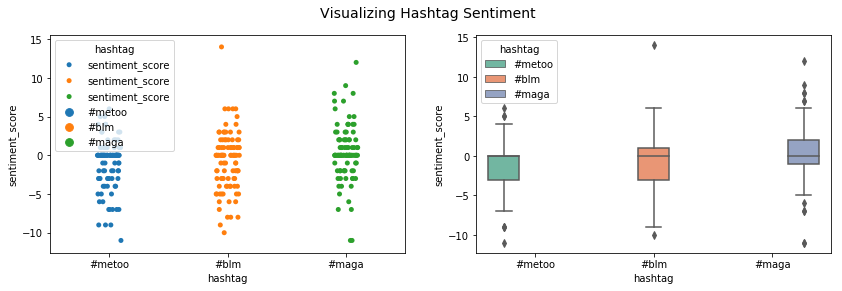

In [20]:
# spread of sentiment polarity
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='hashtag', y="sentiment_score", 
                   hue='hashtag', data=df, ax=ax1)
bp = sns.boxplot(x='hashtag', y="sentiment_score", 
                 hue='hashtag', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Hashtag Sentiment', fontsize=14)
plt.show()

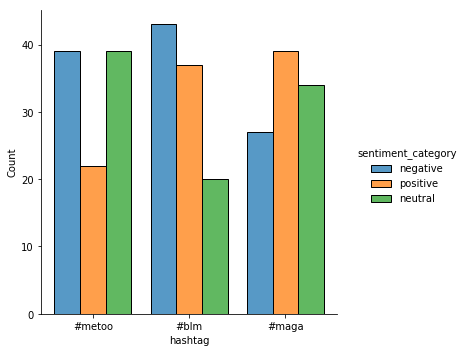

In [22]:
dp = sns.displot(x="hashtag", data=df, hue = 'sentiment_category', multiple="dodge", shrink=.8
                )

metoo has the lowest number of positive sentiments, maga has the highest

blm has the lowest number of neutral sentiments, metoo has the highest

maga has the lowest number of negative sentiments, blm has the highest

what were the most positive and negative reviews about?

In [30]:
#positive tweets
df[(df['hashtag'] == "#blm") & (df.sentiment_score == max(df.sentiment_score))]

,tweet,hashtag,sentiment_score,sentiment_category
79,Happy National Daughters Day🌸\nHappy to have o...,#blm,14.0,positive


In [37]:
#negative tweets
x = df[df['hashtag'] == '#blm']
x[x['sentiment_score'] == min(x['sentiment_score'])]

,tweet,hashtag,sentiment_score,sentiment_category
33,@Vonthee stop relating to #USA #Australia #Whi...,#blm,-10.0,negative


In [39]:
df[(df['hashtag'] == "#maga") & (df.sentiment_score == min(df.sentiment_score))]

,tweet,hashtag,sentiment_score,sentiment_category
79,"@jeffblack945 Fuck you, you moronic, hateful l...",#maga,-11.0,negative
82,"@DonnyDeutsch Fuck you, you moronic, hateful l...",#maga,-11.0,negative


In [42]:
#neutral tweets
df[(df['hashtag'] == "#metoo") & (df.sentiment_category == 'neutral')][:3]

,tweet,hashtag,sentiment_score,sentiment_category
4,@briantylercohen It’s the voters paying them t...,#metoo,0.0,neutral
5,Not to digress but the #MeToo movement was sta...,#metoo,0.0,neutral
6,@SarahHuckabee Women aren’t the “minority” the...,#metoo,0.0,neutral


##  Visualization
Pie charts

In [45]:
#need to create a function to do this for each hashtag
import plotly.express as px

df_pie_metoo = df[df['hashtag'] == '#metoo']

#breaking positives, negatives, and neutrals in separate dataframes, 
#selecting sentiment scores, 
#ounting how many scores in each dataframe
#making it a type string so that it can go into px.pie

pos_num_metoo = df_pie_metoo[df_pie_metoo['sentiment_category'] == 'positive']['sentiment_score'].count().astype(str)
neg_num_metoo = df_pie_metoo[df_pie_metoo['sentiment_category'] == 'negative']['sentiment_score'].count().astype(str)
neu_num_metoo = df_pie_metoo[df_pie_metoo['sentiment_category'] == 'neutral']['sentiment_score'].count().astype(str)

scores = [pos_num_metoo, neg_num_metoo, neu_num_metoo]
print(scores)
fig = px.pie(df_pie_metoo, values=[pos_num_metoo, neg_num_metoo, neu_num_metoo], names= ['Positive', 'Negative', 'Neutral'], title='Me Too Sentimentient Categories')
fig.show()

['22', '39', '39']


In [46]:
df_pie_blm = df[df['hashtag'] == '#blm']

pos_num_blm = df_pie_blm[df_pie_blm['sentiment_category'] == 'positive']['sentiment_score'].count().astype(str)
neg_num_blm = df_pie_blm[df_pie_blm['sentiment_category'] == 'negative']['sentiment_score'].count().astype(str)
neu_num_blm = df_pie_blm[df_pie_blm['sentiment_category'] == 'neutral']['sentiment_score'].count().astype(str)

scores = [pos_num_blm, neg_num_blm, neu_num_blm]
print(scores)
fig = px.pie(df_pie_blm, values=[pos_num_blm, neg_num_blm, neu_num_blm], names= ['Positive', 'Negative', 'Neutral'], title='BLM Sentimentient Categories')
fig.show()

['37', '43', '20']


In [47]:
df_pie_maga = df[df['hashtag'] == '#maga']

pos_num_maga = df_pie_maga[df_pie_maga['sentiment_category'] == 'positive']['sentiment_score'].count().astype(str)
neg_num_maga = df_pie_maga[df_pie_maga['sentiment_category'] == 'negative']['sentiment_score'].count().astype(str)
neu_num_maga = df_pie_maga[df_pie_maga['sentiment_category'] == 'neutral']['sentiment_score'].count().astype(str)

scores = [pos_num_maga, neg_num_maga, neu_num_maga]
print(scores)
fig = px.pie(df_pie_maga, values=[pos_num_maga, neg_num_maga, neu_num_maga], names= ['Positive', 'Negative', 'Neutral'], title='MAGA Sentimentient Categories')
fig.show()

['39', '27', '34']


# Launching Visualization to Dash

In [ ]:
import pandas as pd
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objects as go

from dash.dependencies import Input, Output

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

app.layout = html.Div([
    html.H1("Twitter Hashtag Dashboard", style={'text-align': 'center'}),
    html.Br(),
    dcc.Tabs(id='tabs', value='tab-1', 
             children=[
                dcc.Tab(label='Tab one', value='tab-1'),
                dcc.Tab(label='Tab two', value='tab-2'),
    ]),
    html.Div(id='tabs-content')
])


@app.callback(Output('tabs-content', 'children'),
        [Input('tabs', 'value')])

def render_content(tab):
    
    if tab == 'tab-1':
        return html.Div([
            html.H3('#metoo'),
                dcc.Graph(figure={
                                'data': [
                                    go.Pie(
                                        labels=['Positives', 'Negatives', 'Neutrals'], 
                                        values=[pos_num_metoo, neg_num_metoo, neu_num_metoo],
                                        name="View Metrics",
                                        marker_colors=['rgba(184, 247, 212, 0.6)','rgba(255, 50, 50, 0.6)','rgba(131, 90, 241, 0.6)'],
                                        textinfo='value',
                                        hole=.65)
                                ]

                            }),
            html.H3('#blm'),
                dcc.Graph(figure={
                                'data': [
                                    go.Pie(
                                        labels=['Positives', 'Negatives', 'Neutrals'], 
                                        values=[pos_num_blm, neg_num_blm, neu_num_blm],
                                        name="View Metrics",
                                        marker_colors=['rgba(184, 247, 212, 0.6)','rgba(255, 50, 50, 0.6)','rgba(131, 90, 241, 0.6)'],
                                        textinfo='value',
                                        hole=.65)
                                ]

                            }),
            html.H3('#maga'),
                dcc.Graph(figure={
                                'data': [
                                    go.Pie(
                                        labels=['Positives', 'Negatives', 'Neutrals'], 
                                        values=[pos_num_maga, neg_num_maga, neu_num_maga],
                                        name="View Metrics",
                                        marker_colors=['rgba(184, 247, 212, 0.6)','rgba(255, 50, 50, 0.6)','rgba(131, 90, 241, 0.6)'],
                                        textinfo='value',
                                        hole=.65)
                                ]

                            })
        
        ])
    
    
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Sentiment Scores'),
        dcc.Graph(
                figure={
                    'data': [
                        {'x': ['metoo', 'blm', 'maga'], 'y': [neu_num_metoo, neu_num_blm, neu_num_maga],
                            'type': 'bar', 'name': 'Neutral', 'marker': {"color": 'rgba(131, 90, 241, 0.6)'}},
                        {'x': ['metoo', 'blm', 'maga'], 'y': [pos_num_metoo, pos_num_blm, pos_num_maga],
                         'type': 'bar', 'name': 'Positive', 'marker': {"color": 'rgba(184, 247, 212, 0.6)'}},
                        {'x': ['metoo', 'blm', 'maga'], 'y': [neg_num_metoo, neg_num_blm, neg_num_maga],
                         'type': 'bar', 'name': 'Negative', 'marker': {"color": 'rgba(255, 50, 50, 0.6)'}}
                    ]
                }
            )
        ])


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
